In [22]:
#import libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
import seaborn as sns


In [16]:
#reading the data

rest_df = pd.read_csv('restaurant.csv')

rest_df.head()

,resp_nr,satisfaction,reception,service,waitingtime,quality,price,gender,female,priceSquared
0,1,4,3,5,6,3,1,1,0,1
1,2,5,5,3,5,3,5,2,1,25
2,3,5,2,5,4,4,1,2,1,1
3,4,4,5,6,7,3,5,1,0,25
4,5,6,4,7,7,5,5,2,1,25


In [20]:
#information on the columns

rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   resp_nr       107 non-null    int64
 1   satisfaction  107 non-null    int64
 2   reception     107 non-null    int64
 3   service       107 non-null    int64
 4   waitingtime   107 non-null    int64
 5   quality       107 non-null    int64
 6   price         107 non-null    int64
 7   gender        107 non-null    int64
 8   female        107 non-null    int64
 9   priceSquared  107 non-null    int64
dtypes: int64(10)
memory usage: 8.5 KB


In [21]:
#descriptive analysis of the data

rest_df.describe()

,resp_nr,satisfaction,reception,service,waitingtime,quality,price,gender,female,priceSquared
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,54.000000,5.121495,3.990654,5.317757,5.719626,3.429907,3.280374,1.579439,0.579439,13.803738
std,31.032241,1.286433,1.085890,0.996202,1.257389,0.912307,1.752596,0.495972,0.495972,10.814420
min,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,27.500000,4.000000,3.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.000000
50%,54.000000,5.000000,4.000000,6.000000,6.000000,3.000000,4.000000,2.000000,1.000000,16.000000
75%,80.500000,6.000000,5.000000,6.000000,7.000000,4.000000,5.000000,2.000000,1.000000,25.000000
max,107.000000,7.000000,6.000000,7.000000,7.000000,6.000000,5.000000,2.000000,1.000000,25.000000


<AxesSubplot:title={'center':'Correlation between IVs'}>

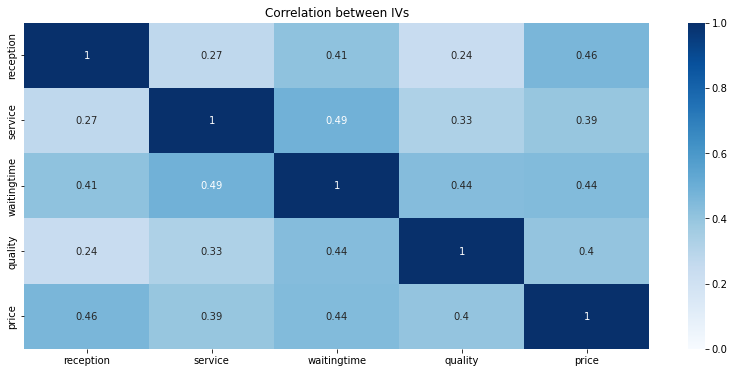

In [41]:
#calculating the correlation between the variables

#removing irrelevant IVs from the df
#did we remove the DV from correlation matrix
corr_df = rest_df.drop(['gender', 'female', 'priceSquared', 'resp_nr', 'satisfaction'], axis = 1)

#converting the df to a correlation datafraame
corr_df = corr_df.corr(method='pearson')
plt.figure(figsize = (14,6))
plt.title("Correlation between IVs")

sns.heatmap(corr_df, annot=True, fmt='0.2g', vmin = 0, vmax = 1, cmap = 'Blues')

In [45]:
#linear regression

model1_df = rest_df[['satisfaction', 'reception', 'service', 'waitingtime', 'quality', 'price']]
model1_df

,satisfaction,reception,service,waitingtime,quality,price
0,4,3,5,6,3,1
1,5,5,3,5,3,5
2,5,2,5,4,4,1
3,4,5,6,7,3,5
4,6,4,7,7,5,5
...,...,...,...,...,...,...
102,7,3,6,7,4,5
103,7,5,6,7,5,5
104,3,2,3,3,3,1
105,7,4,6,5,4,5


In [46]:
#creating predictors and targets

predictors = model1_df.drop('satisfaction', axis = 1)
target = model1_df['satisfaction']

print(predictors)
print(target)

     reception  service  waitingtime  quality  price
0            3        5            6        3      1
1            5        3            5        3      5
2            2        5            4        4      1
3            5        6            7        3      5
4            4        7            7        5      5
..         ...      ...          ...      ...    ...
102          3        6            7        4      5
103          5        6            7        5      5
104          2        3            3        3      1
105          4        6            5        4      5
106          4        5            6        2      2

[107 rows x 5 columns]
0      4
1      5
2      5
3      4
4      6
      ..
102    7
103    7
104    3
105    7
106    5
Name: satisfaction, Length: 107, dtype: int64


In [68]:
#train test split
#train test split not being used here.
#predictors are IV(X) and targets are DV(Y) : x = y format

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=0.2)


In [98]:
#fitting the whole model without doing a train/test split

model = LinearRegression()
model.fit(predictors, target) #model.fit(X,Y)

print("Model coefficient is:\n", predictors.columns.values,  model.coef_)
print("Model intercept is : \n", model.intercept_)


Model coefficient is:
 ['reception' 'service' 'waitingtime' 'quality' 'price'] [0.23079989 0.26476868 0.17947122 0.44150725 0.12903317]
Model intercept is : 
 -0.17163665836001396


Coefficients are the unstandardized b-coefficients from the SPSS table
Intercept is the constant value

In [96]:
import statsmodels.api as sm
#fitting the model using statsmodel api for better summary extraction

predictorsX = sm.add_constant(predictors) #to add constant in the model, leading to more accurate r-squared
modelSummary = sm.OLS(target, predictorsX) #model.fit(Y,X)
model_fii = modelSummary.fit()
model_fii.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           satisfaction   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     27.36
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           2.07e-17
Time:                        00:35:18   Log-Likelihood:                -132.46
No. Observations:                 107   AIC:                             276.9
Df Residuals:                     101   BIC:                             293.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1716      0.548     -0.313      0.755      -1.258       0.914
reception       0.2308      0.090      2.571      0.012       0.053       0.409
service         0.2648      0.099      2.680      0.009       0.069       0.461
waitingtime     0.1795      0.085      2.106      0.038       0.010       0.348
quality         0.4415      0.106      4.181      0.000       0.232       0.651
price           0.1290      0.059      2.176      0.032       0.011       0.247
==============================================================================
Omnibus:                        2.967   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.612
Skew:                          -0.381   Prob(JB):                        0.271
Kurtosis:                       3.065   Cond. No.                         67.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using statsmodel since we get a better summary of the model.
However, using this method does not create the constant value or the intercept (as created by sklearn)
Hence, we need to add a constant by the above given method

In [93]:
#model 2 - including gender by converting binary to rank based 

model2_df = rest_df[['satisfaction', 'reception', 'service', 'waitingtime', 'quality', 'price', 'gender']]
model2_df

,satisfaction,reception,service,waitingtime,quality,price,gender
0,4,3,5,6,3,1,1
1,5,5,3,5,3,5,2
2,5,2,5,4,4,1,2
3,4,5,6,7,3,5,1
4,6,4,7,7,5,5,2
...,...,...,...,...,...,...,...
102,7,3,6,7,4,5,1
103,7,5,6,7,5,5,1
104,3,2,3,3,3,1,2
105,7,4,6,5,4,5,2


In [94]:
#splitting into predictors and targets
predictors2, target2 = model2_df.drop('satisfaction', axis = 1), model2_df[['satisfaction']]
predictors2, target2

(     reception  service  waitingtime  quality  price  gender
 0            3        5            6        3      1       1
 1            5        3            5        3      5       2
 2            2        5            4        4      1       2
 3            5        6            7        3      5       1
 4            4        7            7        5      5       2
 ..         ...      ...          ...      ...    ...     ...
 102          3        6            7        4      5       1
 103          5        6            7        5      5       1
 104          2        3            3        3      1       2
 105          4        6            5        4      5       2
 106          4        5            6        2      2       1
 
 [107 rows x 6 columns],
      satisfaction
 0               4
 1               5
 2               5
 3               4
 4               6
 ..            ...
 102             7
 103             7
 104             3
 105             7
 106             5
 

In [100]:
#directing using OLS method for model fit

predictors2X = sm.add_constant(predictors2)
model2 = sm.OLS(target2, predictors2X)
modelNew2 = model2.fit()
modelNew2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           satisfaction   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     30.73
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.15e-20
Time:                        00:38:49   Log-Likelihood:                -122.36
No. Observations:                 107   AIC:                             258.7
Df Residuals:                     100   BIC:                             277.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7651      0.517     -1.479      0.142      -1.791       0.261
reception       0.1986      0.082      2.410      0.018       0.035       0.362
service         0.2286      0.091      2.521      0.013       0.049       0.408
waitingtime     0.2098      0.078      2.683      0.009       0.055       0.365
quality         0.3292      0.100      3.303      0.001       0.131       0.527
price           0.1102      0.054      2.027      0.045       0.002       0.218
gender          0.7520      0.165      4.559      0.000       0.425       1.079
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.157
Skew:                           0.003   Prob(JB):                        0.925
Kurtosis:                       2.813   Cond. No.                         71.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Seeing improved r-squared values when gender is added

Model 3 - Adding price squared to IVs to check quadratic influence

In [109]:
#model 3
model3_df = rest_df[['satisfaction', 'reception', 'service', 'waitingtime', 'quality', 'price', 'gender', 'priceSquared']]
model3_df


,satisfaction,reception,service,waitingtime,quality,price,gender,priceSquared
0,4,3,5,6,3,1,1,1
1,5,5,3,5,3,5,2,25
2,5,2,5,4,4,1,2,1
3,4,5,6,7,3,5,1,25
4,6,4,7,7,5,5,2,25
...,...,...,...,...,...,...,...,...
102,7,3,6,7,4,5,1,25
103,7,5,6,7,5,5,1,25
104,3,2,3,3,3,1,2,1
105,7,4,6,5,4,5,2,25


In [113]:
predictors3, target3 = model3_df.drop('satisfaction', axis = 1), model3_df[['satisfaction']]
predictors3, target3

(     reception  service  waitingtime  quality  price  gender  priceSquared
 0            3        5            6        3      1       1             1
 1            5        3            5        3      5       2            25
 2            2        5            4        4      1       2             1
 3            5        6            7        3      5       1            25
 4            4        7            7        5      5       2            25
 ..         ...      ...          ...      ...    ...     ...           ...
 102          3        6            7        4      5       1            25
 103          5        6            7        5      5       1            25
 104          2        3            3        3      1       2             1
 105          4        6            5        4      5       2            25
 106          4        5            6        2      2       1             4
 
 [107 rows x 7 columns],
      satisfaction
 0               4
 1               5
 2  

In [114]:
#creating the OLS model again


#directing using OLS method for model fit

predictors3X = sm.add_constant(predictors3)
modelSummary3 = sm.OLS(target3, predictors3X)
modelNew3 = modelSummary3.fit()

modelNew3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           satisfaction   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     26.21
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           5.68e-20
Time:                        00:46:57   Log-Likelihood:                -122.18
No. Observations:                 107   AIC:                             260.4
Df Residuals:                      99   BIC:                             281.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5341      0.655     -0.815      0.417      -1.835       0.766
reception        0.1953      0.083      2.357      0.020       0.031       0.360
service          0.2233      0.091      2.443      0.016       0.042       0.405
waitingtime      0.2170      0.079      2.732      0.007       0.059       0.375
quality          0.3206      0.101      3.172      0.002       0.120       0.521
price           -0.0844      0.342     -0.247      0.805      -0.763       0.594
gender           0.7478      0.166      4.514      0.000       0.419       1.076
priceSquared     0.0321      0.056      0.577      0.565      -0.078       0.143
==============================================================================
Omnibus:                        0.054   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.198
Skew:                           0.029   Prob(JB):                        0.906
Kurtosis:                       2.798   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see worse results than model2, hence using a quadratic equation here is not improving the model